<a href="https://colab.research.google.com/github/FemiAdesola/Data-Science/blob/main/Operations_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <ins>**THE DATA SCIENCE FOR BUSINESS**



<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning
  </td></tr>
</table>


# <ins>**Operation Departmet**
+ Al/ML/DL has been revolutionizing healthcare and medicine:
  + Medical imagery
  + Drug research
  + Genome development

+ Deep learning has been proven to be superior in detecting and classifying disease using imagery data.

+ Skin cancer could be detected more accurately by
Deep Learning than by dermatologists (2018).
  + Human dermatologists detection = 86.6%
  + Deep Learning detection = 95%

  Reference: "Computer learns to detect skin cancer more accurately than doctors". The Guardian. 29 May 2018

# <ins>**Case study**
+ In this case study, we will assume that you work as a
Deep Learning Consultant.
+ You have been hired by a hospital in downtown
Toronto and you have been tasked to automate the process of detecting and classifying chest disease and reduce the cost and time of detection.
+ The team has collected extensive X-Ray chest data and they approached you to develop a model that could detect and classify the diseases in less than 1 minute.
+ You have been provided with 133 images that belong
to 4 classes:
  + Healthy
  + Covid-19
  + Bacterial Pneumonia
  + Viral Pneumonia

# <ins>**IMPORT LIBRARIES AND DATASET**

In [1]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# For mounting the drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Specify training data directory
XRay_Directory = '/content/drive/My Drive/Colab Notebooks/Chest_X_Ray'


In [4]:
# List the folders in the directory
os.listdir(XRay_Directory)

['2', '3', '1', '0']

And within the training data, we will divide it into 80 percent for training and 20 percent for cross-validation.
  + we use cross-validation to make sure that our model is not overfitting the training data.
  + We want the model to be able to generalize, and not memorize.
  + We want the model to see, for example, images of new patients and still work.

In [5]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation
image_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.2) # 0.2 means 20% allocated for validation


## For generating 40 batches of images
  + Total number of images is 133*4 = 532 images
  + Shuffle means change the other of data

In [6]:
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

train_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="training")


Found 428 images belonging to 4 classes.


In [7]:
# For creating validation generator

validation_generator = image_generator.flow_from_directory(batch_size = 40, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="validation")

Found 104 images belonging to 4 classes.


In [8]:
# For generating a batch of 40 images and labels
train_images, train_labels = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels.shape

(40, 4)

In [11]:
train_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]],

+ Classes
    + Healthy
    + Covid-19
    + Viral Pneumonia
    + Bacterial Pneumonia
  
  
  This array shows the position of each class, for example 0 means absence of the class and  1 means present


In [12]:
# labels Translator
# labels Translator
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

# <ins>**VISUALIZE DATASET**

For Createing a grid of 36 images along with their corresponding labels
  + Length of 6
  + Width of 6

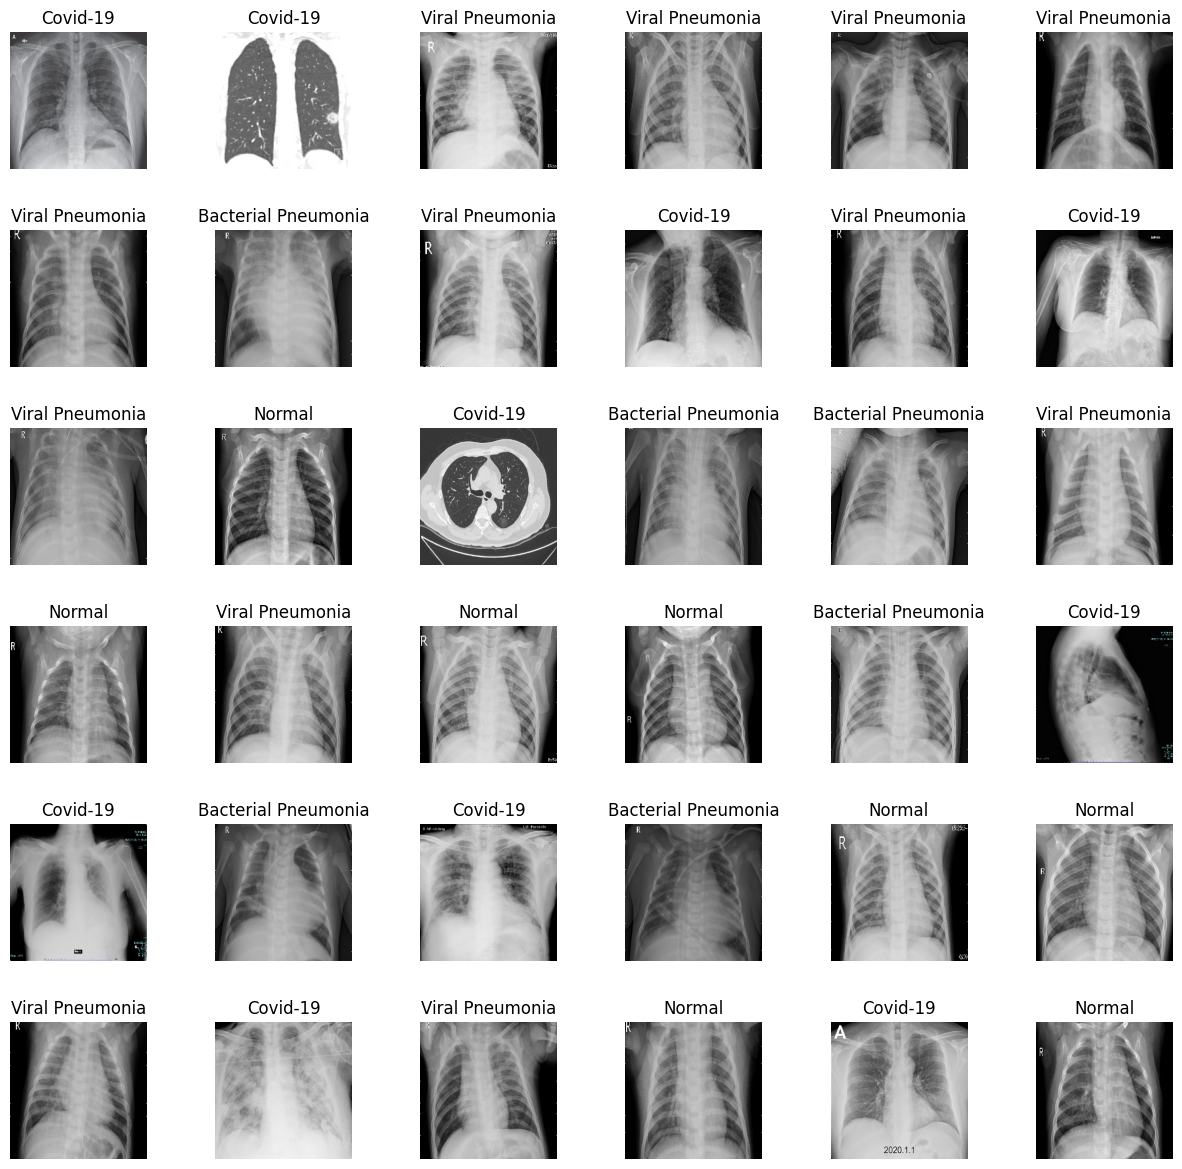

In [13]:
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel() # ravel is used to flatten the axis

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off') # For gettng rid of axis

plt.subplots_adjust(wspace = 0.5)  # For adjusting space

# <ins>**UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS**

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

# <ins>**DEEP LEARNING HISTORY**
+ There are many trained off the shelve convolutional neural networks that are readily available such as:
  + **LeNet-5 (1998)**: 7 level convolutional neural network developed by LeCun that works in classifying hand writing numbers.
  + **AlexNet (2012)**: Offered massive improvement, error reduction from 26% to 15.3%
  + **ZFNEt (2013)**: achieved error of 14.8%
  + **Googlenet/Inception (2014**): error reduction to 6.67% which is at par with human level accuracy.
  + **VGGNet (2014)**
  + **ResNet (2015)**: Residual Neural Network includes "skip connection" feature and therefore enabled training of 152 layers without vanishing gradient issues. Error of 3.57% which is superior than humans.

  Data Source: https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5
  

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# <ins>**UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING**

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# <ins>**IMPORT MODEL WITH PRETRAINED WEIGHTS**

In [14]:
# freezing layers in the model


# <ins>**BUILD AND TRAIN DEEP LEARNING MODEL**

In [15]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)

# save the best model with lower validation loss


# <ins>**EVALUATE TRAINED DEEP LEARNING MODEL**